In [2]:
import re
import numpy as np

# Function to parse the data file
def parse_data(filename):
    data = []
    content = None
    with open(filename, 'r') as f:
        content = f.read()

    assert content is not None

    sections = content.split('--')
    for section in sections:
        if not section.strip():
            continue

        lines = section.strip().split('\n')
        assert len(lines) == 6

        t_cd = lines[0].split()[-2]
        t_cd = float(t_cd)
        t_isdf_build = lines[1].split()[-2]
        t_isdf_build = float(t_isdf_build)
        t_vj = lines[2].split()[-2]
        t_vj = float(t_vj)
        t_vk = lines[3].split()[-2]
        t_vk = float(t_vk)

        line = lines[5].split("###")[1].split(",")
        ke_cutoff = float(line[0])
        c0 = float(line[1])
        k0 = float(line[2])
        m0 = float(line[3])
        cisdf = float(line[4])
        e_tot = float(line[5])

        data.append({
            't_cd': t_cd,
            't_isdf_build': t_isdf_build,
            't_vj': t_vj,
            't_vk': t_vk,
            'ke_cutoff': ke_cutoff,
            'c0': c0,
            'k0': k0,
            'm0': m0,
            'cisdf': cisdf,
            'e_tot': e_tot
        })
        
    return data

# Parse the data
data = parse_data('save-vjk-jy.out')
print(len(data))

ene_ref = -36.390024

24


[ 3375  9261 15625 24389] [ 0.77  8.76 39.87 89.95]
[ 3375  9261 15625 24389] [ 1.    7.29 22.48 67.09]
[ 3375  9261 15625 24389] [ 0.73  8.68 27.55 66.86]
[ 3375  9261 15625 24389] [ 0.73  9.17 30.2  87.29]
[ 3375  9261 15625 24389] [ 0.81  9.18 30.62 88.35]


(11.720671786825555, 14.573942985382716)

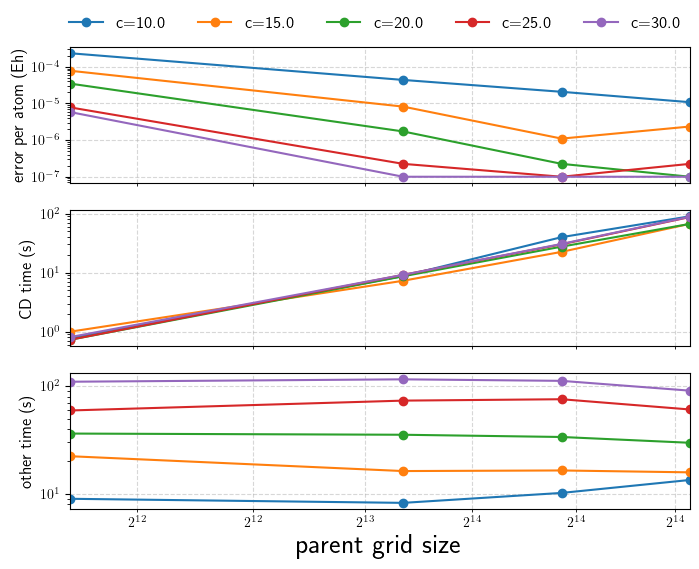

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(3, 1, figsize=(8, 6), sharex=True)

cs = [entry['c0'] for entry in data]
cs = set(cs)

ks = [entry['k0'] for entry in data]
ks = set(ks)

kk = {
    20.0: 3375,
    40.0: 9261,
    60.0: 15625,
    80.0: 24389,
}

ax = axs[0]
for c in cs:
    if c == 5.0:
        continue

    x = [kk[entry['k0']] for entry in data if entry['c0'] == c]
    y = [abs(entry['e_tot'] - ene_ref) / 8 + 1e-7 for entry in data if entry['c0'] == c]
    x = np.array(x)
    y = np.array(y)
    mask = np.argsort(x)
    x = np.log2(x[mask])
    y = y[mask]

    ax.semilogy(x, y, label=f'c={c}', marker='o', linestyle='-', base=10)
    ax.grid(alpha=0.5, linestyle='--', which='minor', axis='x')
    ax.grid(alpha=0.5, linestyle='--', which='major', axis='y')


ax = axs[1]
for c in cs:
    if c == 5.0:
        continue

    x = [kk[entry['k0']] for entry in data if entry['c0'] == c]
    y = [entry['t_cd'] for entry in data if entry['c0'] == c]
    x = np.array(x)
    y = np.array(y)
    mask = np.argsort(x)

    print(x[mask], y[mask])
    x = np.log2(x[mask])
    y = y[mask]

    ax.loglog(x, y, label=f'c={c}', marker='o', linestyle='-')
    ax.grid(alpha=0.5, linestyle='--', which='minor', axis='x')
    ax.grid(alpha=0.5, linestyle='--', which='major', axis='y')

ax = axs[2]
for c in cs:
    if c == 5.0:
        continue

    x = [kk[entry['k0']] for entry in data if entry['c0'] == c]
    y = [entry['t_isdf_build'] for entry in data if entry['c0'] == c]
    x = np.array(x)
    y = np.array(y)
    mask = np.argsort(x)
    x = x[mask]
    y = y[mask]
    x = np.log2(x)

    ax.loglog(x, y, label=f'c={c}', marker='o', linestyle='-')
    ax.grid(alpha=0.5, linestyle='--', which='minor', axis='x')
    ax.grid(alpha=0.5, linestyle='--', which='major', axis='y')

# # xmin = np.min(x)
# # xmax = np.max(x)
# # xticks = [2**i for i in range(int(np.log2(xmin)), int(np.log2(xmax)) + 1)]
# # xtick_labels = [r"$2^{%d}$" % i for i in range(int(np.log2(xmin)), int(np.log2(xmax)) + 1)]
# # ax.set_xticks(xticks)
# # ax.set_xticklabels(xtick_labels)
# # print(xticks)
# # print(xtick_labels)

axs[0].legend(
    fontsize=12, loc='upper right',
    bbox_to_anchor=(1.0, 1.3),
    borderaxespad=0.2,
    frameon=False, ncol=5
)
axs[-1].set_xlabel('parent grid size', fontsize=20)
axs[0].set_ylabel('error per atom (Eh)', fontsize=12)
axs[1].set_ylabel('CD time (s)', fontsize=12)
axs[2].set_ylabel('other time (s)', fontsize=12)

from matplotlib import ticker
axs[-1].xaxis.set_minor_formatter(ticker.FuncFormatter(lambda x, pos: f"$2^{{{x:.0f}}}$"))
axs[-1].set_xlim(x.min(), x.max())

# plt.show()


In [4]:
x = [ 3375, 9261, 15625, 24389] 
y = [ 0.77, 8.76, 39.87, 89.95]

coefficients = np.polyfit(np.log(x), np.log(y), 1)
slope = coefficients[0]
intercept = coefficients[1]
print(slope, intercept)

2.454851203835063 -20.193908646714668


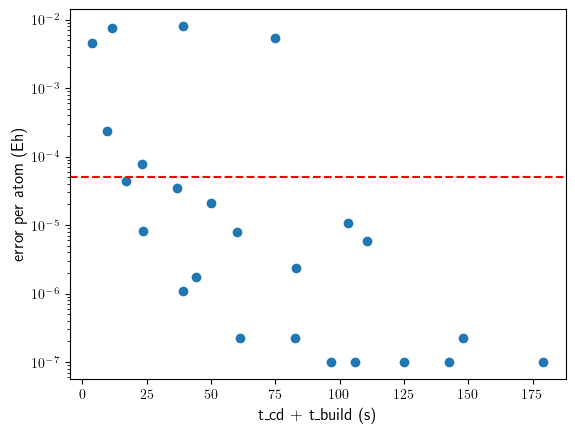

In [5]:
# make a scatter plot of the t_cd + t_build vs error
x = [entry['t_cd'] + entry['t_isdf_build'] for entry in data]
y = [abs(entry['e_tot'] - ene_ref) / 8 + 1e-7 for entry in data]

plt.scatter(x, y)
plt.yscale('log')
plt.xlabel('t_cd + t_build (s)', fontsize=12)
plt.ylabel('error per atom (Eh)', fontsize=12)
plt.axhline(y=5e-5, color='red', linestyle='--')
plt.show()

In [10]:
for d in sorted(data, key=lambda d: abs(d['t_cd'] + d['t_isdf_build'])):
    err = abs(d['e_tot'] - ene_ref) / 8 + 1e-7
    if err > 5e-5:
        continue
    t_tot = d['t_cd'] + d['t_isdf_build']
    print(d['e_tot'], err, t_tot, d['k0'], d['c0'])


-36.389673 4.39749999993604e-05 16.98 40.0 10.0
-36.389959 8.224999999914451e-06 23.529999999999998 40.0 15.0
-36.389745 3.4974999999878755e-05 36.97 20.0 20.0
-36.390032 1.1000000001397779e-06 38.93 60.0 15.0
-36.390011 1.724999999449983e-06 44.01 40.0 20.0
-36.39019 2.0850000000013812e-05 50.04 60.0 10.0
-36.389962 7.849999999973057e-06 60.129999999999995 20.0 25.0
-36.390025 2.2500000057258375e-07 61.230000000000004 60.0 20.0
-36.390023 2.2499999968440533e-07 82.53 40.0 25.0
-36.390006 2.3499999996483665e-06 82.89 80.0 15.0
-36.390024 1e-07 96.61 80.0 20.0
-36.389938 1.0849999999504212e-05 103.37 80.0 10.0
-36.390024 1e-07 105.77 60.0 25.0
-36.39007 5.850000000581679e-06 110.72 20.0 30.0
-36.390024 1e-07 124.87 40.0 30.0
-36.390024 1e-07 142.62 60.0 30.0
-36.390025 2.2500000057258375e-07 147.98000000000002 80.0 25.0
-36.390024 1e-07 179.14999999999998 80.0 30.0
